In [74]:
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


 # Curated Dataset

### Dataset Overview

- The curated dataset contains **159,150** data points.
- Each data point consists of the following fields:
  - `image_id`
  - `full_image_path`
  - `question`
  - `answer`
- Each image is associated with **five** unique question-answer pairs.


In [77]:
df = pd.read_csv('finalDataset.csv')  
df['full_image_path'] = df['full_image_path'].str.replace("\\", "/", regex=False)

In [78]:
print("Total rows:", len(df))
df.info()

Total rows: 159150
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159150 entries, 0 to 159149
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   image_id         159150 non-null  object
 1   full_image_path  159150 non-null  object
 2   question         159150 non-null  object
 3   answer           159096 non-null  object
dtypes: object(4)
memory usage: 4.9+ MB


In [80]:
df

,image_id,full_image_path,question,answer
0,81+4dBN1jsL,abo-images-small/images/small/9d/9dfccb37.jpg,What shape is this?,Rectangular
1,81+4dBN1jsL,abo-images-small/images/small/9d/9dfccb37.jpg,Is it a cover?,Yes
2,81+4dBN1jsL,abo-images-small/images/small/9d/9dfccb37.jpg,What color is bottom?,Red
3,81+4dBN1jsL,abo-images-small/images/small/9d/9dfccb37.jpg,Are there multiple colors?,Yes
4,81+4dBN1jsL,abo-images-small/images/small/9d/9dfccb37.jpg,Is there a camera hole?,Yes
...,...,...,...,...
159145,81yoY30yFiL,abo-images-small/images/small/7a/7ab6a11b.jpg,What word is centered on the cover?,Super
159146,81yoY30yFiL,abo-images-small/images/small/7a/7ab6a11b.jpg,What color is the written text?,Yellow
159147,81yoY30yFiL,abo-images-small/images/small/7a/7ab6a11b.jpg,What is the shape of the cover?,Rectangle
159148,81yoY30yFiL,abo-images-small/images/small/7a/7ab6a11b.jpg,What is the background comprised of?,Fragments


In [5]:
print(f"\nTotal Rows: {len(df)}")


Total Rows: 159150


In [53]:
null_count = df['answer'].isnull().sum()
print(f"Number of null answers: {null_count}")

Number of null answers: 54


## EDA on Images

Q&A Pairs for Image: abo-images-small/images/small/9d/9dfccb37.jpg

Q1: What shape is this?
A1: Rectangular

Q2: Is it a cover?
A2: Yes

Q3: What color is bottom?
A3: Red

Q4: Are there multiple colors?
A4: Yes

Q5: Is there a camera hole?
A5: Yes



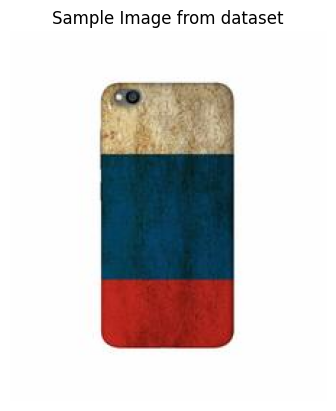

In [102]:
# Print a sample image in dataset with corresponding 5 Question-Answer pairs
sample_image_path = df['full_image_path'].iloc[1]
sample_rows = df[df["full_image_path"] == sample_image_path]

print("Q&A Pairs for Image:", sample_image_path)
print("" * 80)

for idx, row in sample_rows.iterrows():
    print(f"Q{idx % 5 + 1}: {row['question']}")
    print(f"A{idx % 5 + 1}: {row['answer']}\n")

# Show the image
image = Image.open(sample_image_path)
plt.imshow(image)
plt.axis("off")
plt.title("Sample Image from dataset")
plt.show()


In [14]:
# Height and width analysis of all the images 

heights, widths, channels = [], [], []
broken_images = 0

for path in df['full_image_path']:
    try:
        img = Image.open(path).convert("RGB")
        widths.append(img.width)
        heights.append(img.height)
        channels.append(len(img.getbands()))
    except:
        broken_images += 1

print(" Broken images:", broken_images)
print(f"Maximum Height: {max(heights)}  Maximum Width: {max(widths)}")
print(f"Minimum Height: {min(heights)}  Minimum Width: {min(widths)}")
print(f"Mean Height: {np.round(np.mean(heights),2)}  Mean Width: {np.round(np.mean(widths),2)}")
print(f"All images have channel depth of: {list(set(channels))}")



 Broken images: 0
Maximum Height: 256  Maximum Width: 256
Minimum Height: 74  Minimum Width: 69
Mean Height: 254.05  Mean Width: 211.81
All images have channel depth of: [3]


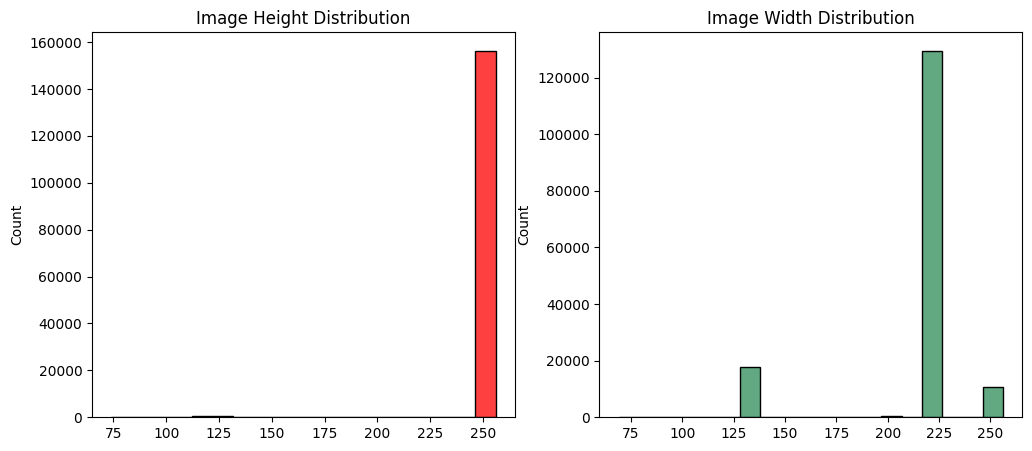

In [107]:
# Plotting height and image distribution of images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(heights, kde=False, color='red')
plt.title('Image Height Distribution')

plt.subplot(1, 2, 2)
sns.histplot(widths, kde=False, color='seagreen')
plt.title('Image Width Distribution')
plt.show()


In [92]:

# Distribution of (height, width) pairs
size_pairs = list(zip(heights, widths))
size_counts = Counter(size_pairs)

size_df = pd.DataFrame(size_counts.items(), columns=["(Height, Width)", "count"])
size_df["percentage"] = (size_df["count"] / len(size_pairs)) * 100
size_df = size_df.sort_values(by="count", ascending=False).reset_index(drop=True)

print("\nImage Sizes:")
print(size_df.head(5))


Image Sizes:
  (Height, Width)   count  percentage
0      (256, 219)  129540   81.394910
1      (256, 134)   17535   11.017908
2      (256, 256)    7805    4.904178
3      (256, 197)     385    0.241910
4      (122, 256)     110    0.069117


######
- #### This distribution shows that most of the images have same height and width.
######

## EDA on Questions

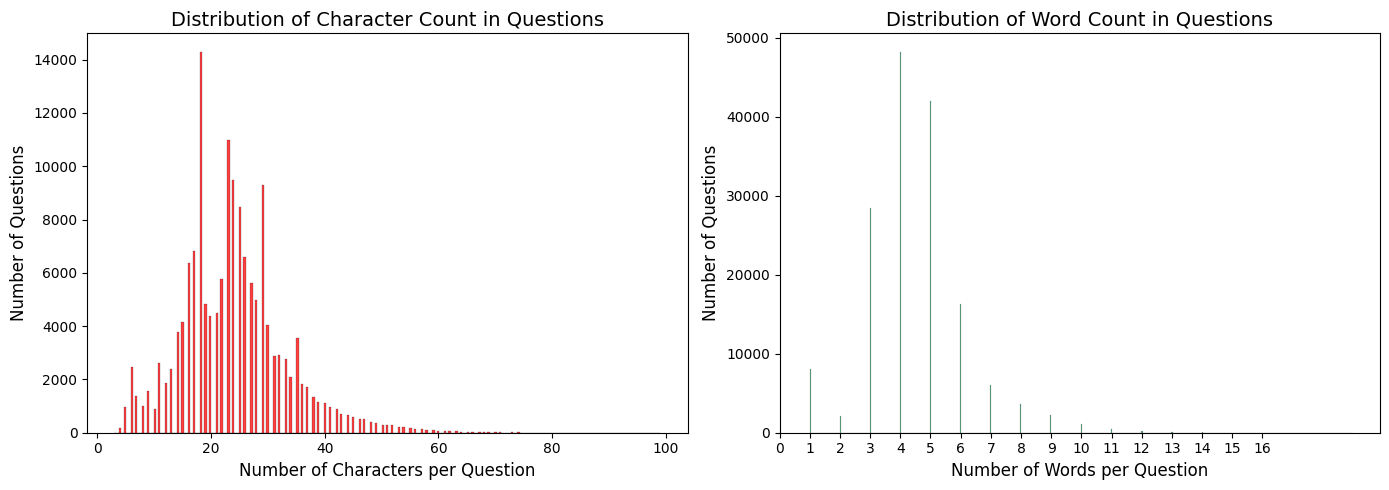

In [108]:
plt.figure(figsize=(14, 5))

# Plot 1: Character Count
plt.subplot(1, 2, 1)
sns.histplot(char_count_que, color='red', kde=False)
plt.title("Distribution of Character Count in Questions", fontsize=14)
plt.xlabel("Number of Characters per Question", fontsize=12)
plt.ylabel("Number of Questions", fontsize=12)

# Plot 2: Word Count
plt.subplot(1, 2, 2)
sns.histplot(word_count_que, color='seagreen', kde=False)
plt.title("Distribution of Word Count in Questions", fontsize=14)
plt.xlabel("Number of Words per Question", fontsize=12)
plt.ylabel("Number of Questions", fontsize=12)

counts, bins = np.histogram(word_count_que, bins=range(int(word_count_que.max()) + 2))
last_nonzero_bin = np.where(counts > 0)[0].max()
plt.xticks(np.arange(0, last_nonzero_bin -2 , 1)) 



plt.tight_layout()
plt.show()

In [23]:
char_count_que = df['question'].apply(len)
word_count_que = df['question'].apply(lambda x: len(x.split()))

print(" Max char count:", max(char_count_que))
print(" Min char count:", min(char_count_que))
print(" Avg char count:", int(np.mean(char_count_que)))
print(" Max word count:", max(word_count_que))
print(" Min word count:", min(word_count_que))
print(" Avg word count:", int(np.mean(word_count_que)))

 Max char count: 99
 Min char count: 3
 Avg char count: 23
 Max word count: 19
 Min word count: 1
 Avg word count: 4


In [84]:
# Count how many questions have exactly one word
one_word_count = sum(word_count_que == 1)
print("Number of questions with ONE word:", one_word_count)


Number of questions with ONE word: 8028


##

- #### We can look at the word and char count of questions. We can observe that average word count is 4 , and there are many questions with just one word

##



In [24]:
# collect unique words
all_words = " ".join(df['question'].tolist()).lower().split()
unique_word_que = set(all_words)
print(" Total unique words in questions:", len(unique_word_que))

# First word frequency
first_words = df['question'].str.lower().str.split().str[0]
first_word_freq = first_words.value_counts(normalize=True).reset_index()
first_word_freq.columns = ['first_word', 'question_%']
first_word_freq['question_count'] = first_words.value_counts().values
print(first_word_freq.head(10))



 Total unique words in questions: 6977
  first_word  question_%  question_count
0         is    0.386635           61533
1       what    0.328677           52309
2        how    0.095187           15149
3        are    0.085071           13539
4      which    0.018448            2936
5       does    0.013685            2178
6      where    0.007741            1232
7  material?    0.004279             681
8     color?    0.004134             658
9     what's    0.003531             562


In [43]:

# We look at words that follow the most occuring first word.

def get_second_word_after(target):
    filtered = df[df['question'].str.lower().str.startswith(target + ' ')]
    return filtered['question'].str.split().str[1].value_counts().head(5)

print(" After 'what':")
print(get_second_word_after('what'))
print("\n After 'is':")
print(get_second_word_after('is'))
print("\n After 'how':")
print(get_second_word_after('how'))


 After 'what':
question
color     17525
is        13523
shape     10969
word       1244
animal     1094
Name: count, dtype: int64

 After 'is':
question
the      21904
there    20582
it       13339
this      1022
a          434
Name: count, dtype: int64

 After 'how':
question
many     15097
many?       15
are         10
does        10
is           5
Name: count, dtype: int64



#####
- Questions starting with **"what"** are often followed by terms like *color*, *shape*, or *animal*, indicating that the question is asking about attributes or categories of the object in the image.

- Questions starting with **"is"** generally form yes/no questions, such as *"Is there..."* or *"Is it..."*. These typically expect binary responses.

- Questions starting with **"how"** are frequently followed by words like *"many"*, indicating questions that are asking for a count or quantity — i.e., numeric answers.
#####

# EDA on Answers

In [87]:
answers = df['answer'].astype(str).str.lower()

# Define categories
yes_no_answers = answers[answers.isin(['yes', 'no'])]
numeric_answers = answers[answers.str.replace('.', '', 1).str.isnumeric()]
other_answers = answers[~answers.isin(['yes', 'no']) & ~answers.str.replace('.', '', 1).str.isnumeric()]

# Count each category
distribution = {
    'Yes/No': len(yes_no_answers),
    'Numbers': len(numeric_answers),
    'Others': len(other_answers)
}



In [88]:
number_words = set("""
zero one two three four five six seven eight nine ten
eleven twelve thirteen fourteen fifteen sixteen seventeen eighteen nineteen twenty
thirty forty fifty sixty seventy eighty ninety hundred thousand million billion
""".split())

def is_yes_no(ans):
    return ans in ["yes", "no"]

def is_numeric(ans):
    ans = str(ans).strip().lower()
    # Check digit or decimal number
    if re.match(r'^\d+(\.\d+)?$', ans):
        return True
    # Check if single number word or multiple number words 
    words = ans.split()
    if all(word in number_words for word in words):
        return True
    return False

df["answer_lower"] = df["answer"].astype(str).str.lower().str.strip()
df["is_yes_no"] = df["answer_lower"].apply(is_yes_no)
df["is_numeric"] = df["answer_lower"].apply(is_numeric)

yes_no_count = df["is_yes_no"].sum()
numeric_count = df["is_numeric"].sum()
other_count = len(df) - (yes_no_count + numeric_count)


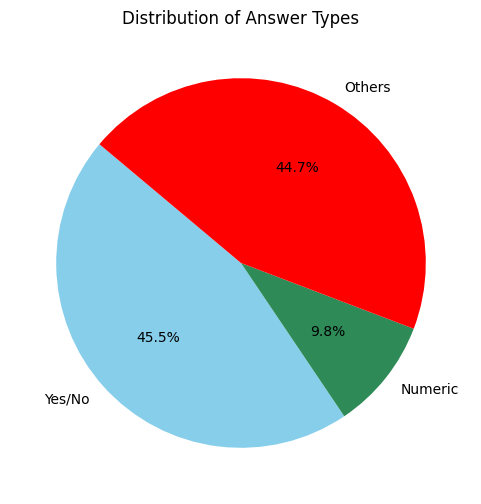

In [109]:
plt.figure(figsize=(6,6))
plt.pie(
    [yes_no_count, numeric_count, other_count],
    labels=["Yes/No", "Numeric", "Others"],
    autopct="%1.1f%%",
    colors=["skyblue", "seagreen", "red"],
    startangle=140
)
plt.title("Distribution of Answer Types")
plt.show()

- Roughly 45% of answers are yes/no

- Around 10% of the answers are numeric

- Rest are mostly colors, shapes etc.

- All the answers are single word
